In [1]:
library(tidyverse)
library(gghalves)
library(patchwork)
library(see)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data cleaning & wrapping & transform

In [2]:
# summary_gappyout <- read_csv("summary_gappyout.csv") %>% mutate(Type = "gappyout")
# summary_gt <- read_csv("summary_gt.csv") %>% mutate(Type = "gt")
# summary_untrimmed <- read_csv("summary_untrimmed.csv") %>% mutate(Type = "untrimmed")
# common_loci <- intersect(summary_gappyout$Locus_name, summary_gt$Locus_name)
# common_loci <- intersect(common_loci, summary_untrimmed$Locus_name)

In [3]:
# summary_all <- bind_rows(summary_gappyout, summary_gt, summary_untrimmed) %>%
#     select(-geodesic_distance)
# summary_all <- summary_all %>%
#   mutate(Percent_parsimony_informative = str_remove(Percent_parsimony_informative, "%") %>% as.numeric()) %>%
#   mutate(If_mix = str_detect(Model_string, "MIX"),
#          Num_class = str_count(Model_string, ",") + 1,
#          geodesic_distance = NULL) %>% 
#   group_by(Locus_name, Type) %>%
#   mutate(If_mix = if(any(If_mix[Model == "Mixture"])) TRUE else FALSE,
#          Num_class_on_mixture = max(Num_class)) %>%
#   ungroup()
# summary_all <- summary_all %>%
#   mutate(Type = factor(Type, levels = c("untrimmed", "gt", "gappyout"))) %>%
#   mutate(Model = factor(Model, levels = c("One_class", "Mixture")))

In [4]:
# summary_all_common <- summary_all %>% filter(Locus_name %in% common_loci) %>% na.omit()
# print(nrow(summary_all_common))

In [5]:
# runtime_gt <- read.csv("running_time_gt.csv") %>% mutate(Type = "gt")
# runtime_gappyout <- read.csv("running_time_gappyout.csv") %>% mutate(Type = "gappyout")
# runtime_untrimmed <- read.csv("running_time_untrimmed.csv") %>% mutate(Type = "untrimmed")
# runtime <- rbind(runtime_gt, runtime_gappyout, runtime_untrimmed) %>%
#   mutate(Model = ifelse(Model == "Single", "One_class", Model))
# rm(runtime_gt, runtime_gappyout, runtime_untrimmed)
# summary_all_common <- left_join(summary_all_common, runtime, by = c("Model","Type", "Locus_name"))

In [6]:
# summary_all_common_diff <- summary_all_common %>%
#   select(Type, Model, Locus_name, where(is.numeric)) %>%
#   select(-c(Length, Ntaxa, Percent_constant, Site_patterns, Num_class, Percent_parsimony_informative, Num_class_on_mixture)) %>%
#   gather(Parameter, Value, -Model, -Locus_name, -Type) %>%
#   spread(Model, Value) %>%
#   group_by(Type, Locus_name, Parameter) %>%
#   summarise(Difference = Mixture - One_class, .groups = "drop") %>%
#   pivot_wider(names_from = Parameter, values_from = Difference)

# summary_diff_add <- summary_all_common %>%
#   select(Type, Model, Locus_name, If_mix, Best, Length, Ntaxa, Percent_constant, Percent_parsimony_informative, 
#          Site_patterns, Num_class, Num_class_on_mixture) %>%
#   filter(Model == "Mixture") %>%
#   select(-Model)

# summary_all_common_diff <- left_join(summary_all_common_diff, summary_diff_add, by = c("Type", "Locus_name"))

In [7]:
# source("./dna_model.R")
# summary_all_common_para <- summary_all_common  %>%
#     mutate(real_base_freq = strsplit(real_base_freq, ";")) %>%
#     mutate(haha = map(parameters, dna_model)) %>%
#     unnest(haha)
# summary_all_common_para <- summary_all_common_para %>% 
#     mutate(base_freq = lapply(summary_all_common_para$base_freq, function(x) ifelse(is.na(x), 
#          list(A = 0.25, C = 0.25, G = 0.25, T = 0.25), x)))
# saveRDS(summary_all_common_para, "summary_all_common.rds")

# # Get the column names of the dataframe
# summary_all_common_diff <- summary_all_common_diff %>% 
#     select(-c(Length, Ntaxa, Percent_constant, Site_patterns, Num_class,  Num_class_on_mixture, Percent_parsimony_informative))
# col_names <- colnames(summary_all_common_diff)
# # Add "d_" to the beginning of each column name except for "Locus_name" and "Type"
# new_col_names <- ifelse(col_names %in% c("Locus_name", "Type"), col_names, paste0("d_", col_names))
# # Assign the new column names to the dataframe
# colnames(summary_all_common_diff) <- new_col_names
# # Now, all column names except for "Locus_name" and "Type" start with "d_"
# summary_all_common_diff <- left_join(summary_all_common_diff, summary_all_common_para %>% filter(Model == "One_class"), by = c("Type", "Locus_name"))
# rm(summary_all_common_para)

In [8]:
# tree_cp_untrimmed <- read.csv("summary_bt_trees_untrimmed.csv") %>% 
#                         mutate(Type = "untrimmed")
# tree_cp_gt <- read.csv("summary_bt_trees_gt.csv") %>% 
#                         mutate(Type = "gt")
# tree_cp_gappyout <- read.csv("summary_bt_trees_gappyout.csv") %>% 
#                         mutate(Type = "gappyout")
# tree_cp <- rbind(tree_cp_untrimmed, tree_cp_gt, tree_cp_gappyout) %>%
#                 rename_with(~ paste0("cp_", .), where(is.numeric)) %>%
#                 select(-tree_1, -tree_2, -geodesic_distance)
# rm(tree_cp_untrimmed, tree_cp_gt, tree_cp_gappyout)
# summary_all_common_diff <- left_join(summary_all_common_diff, tree_cp, by = c("Type", "Locus_name"))

# saveRDS(summary_all_common_diff, "summary_all_common_diff.rds")

## Adding the additional statistics

In [9]:
summary_all_common <- read_rds("summary_all_common.rds")
summary_all_common_diff <- read_rds("summary_all_common_diff.rds")
colnames(summary_all_common_diff)

[1] "Type"                          "Locus_name"                   
 [3] "d_1st Qu."                     "d_3rd Qu."                    
 [5] "d_AIC"                         "d_AICc"                       
 [7] "d_BIC"                         "d_GMM_num_class"              
 [9] "d_KF_distance"                 "d_Likelihood"                 
[11] "d_Max."                        "d_Mean"                       
[13] "d_Median"                      "d_Min."                       
[15] "d_RF_distance"                 "d_Run_time"                   
[17] "d_SPR_distance"                "d_Sum_int"                    
[19] "d_Tree_Length"                 "d_Unconstrained_likelihood"   
[21] "d_nRF_distance"                "d_path_distance"              
[23] "d_prop_int"                    "d_wRF_distance"               
[25] "d_If_mix"                      "d_Best"                       
[27] "Model"                         "Model_string"                 
[29] "Rates"                         "Likelihood"                   
[31] "Unconstrained_likelihood"      "parameters"                   
[33] "AIC"                           "AICc"                         
[35] "BIC"                           "Best"                         
[37] "Length"                        "Ntaxa"                        
[39] "Percent_constant"              "Percent_parsimony_informative"
[41] "Site_patterns"                 "real_base_freq"               
[43] "GMM_pro"                       "GMM_mean"                     
[45] "GMM_num_class"                 "RF_distance"                  
[47] "nRF_distance"                  "wRF_distance"                 
[49] "KF_distance"                   "SPR_distance"                 
[51] "path_distance"                 "Tree_Length"                  
[53] "Sum_int"                       "prop_int"                     
[55] "Min."                          "1st Qu."                      
[57] "Median"                        "Mean"                         
[59] "3rd Qu."                       "Max."                         
[61] "If_mix"                        "Num_class"                    
[63] "Num_class_on_mixture"          "Run_time"                     
[65] "class_id"                      "class"                        
[67] "F_type"                        "df_R"                         
[69] "R"                             "F"                            
[71] "Q"                             "base_freq"                    
[73] "cp_RF_distance"                "cp_nRF_distance"              
[75] "cp_wRF_distance"               "cp_KF_distance"               
[77] "cp_SPR_distance"               "cp_path_distance"

In [10]:
get_trace <- function(my_list){
  if(is.null(my_list)){
      return(NA)
  }else{
    sum(diag(matrix(unlist(my_list), nrow = 4, ncol = 4))) + 4  
  }
}
summary_intergated <- summary_all_common_diff %>% 
    mutate(trace_Q = sapply(summary_all_common_diff$Q, get_trace),
           sd_R = sapply(summary_all_common_diff$R, function(x) sd(x, na.rm = TRUE)),
           sd_base_freq = sapply(summary_all_common_diff$base_freq, function(x) sd(x, na.rm = TRUE)))%>% 
    na.omit()
                                 
summary_intergated <- summary_intergated %>% 
    mutate(LperL = Likelihood/Length,
           Num_base = Ntaxa*Length,
           Info_to_cons = Percent_parsimony_informative/Percent_constant,
           Info_length = Percent_parsimony_informative*Length,
           Max_R = sapply(summary_intergated$R, function(x) max(x, na.rm = TRUE)),
           Interval_base_freq =  sapply(summary_intergated$base_freq, function(x){max(x, na.rm = TRUE) - min(x, na.rm = TRUE)}),
           )
summary_all_common <- summary_all_common %>% 
    mutate(GC_content = sapply(summary_all_common$real_base_freq, function(x) as.numeric(x[[2]]) + as.numeric(x[[3]]))) %>% 
    mutate(GC_content = as.numeric(GC_content))           

In [11]:
# Define the function
filter_by_quantile <- function(data, cols, quantile_value, multiplier) {
  # Initialize a vector to store the number of lines trimmed for each column
  lines_trimmed <- numeric(length(cols))
  names(lines_trimmed) <- cols
  
  # Apply the filter condition for each column
  for (col in cols) {
    # Calculate the quantile
    threshold <- quantile(data[[col]], quantile_value) * multiplier
    
    # Store the number of rows before filtering
    rows_before <- nrow(data)
    
    # Filter the data
    data <- data %>% filter(.data[[col]] <= threshold)
    
    # Calculate and store the number of lines trimmed
    lines_trimmed[col] <- rows_before - nrow(data)
  }
  
  # Print the number of lines trimmed for each column
  print(lines_trimmed)
  
  # Return the filtered data
  return(data)
}

summary_intergated <- filter_by_quantile(summary_intergated, c("Max.","Max_R", "Interval_base_freq"), 0.95, 5)


              Max.              Max_R Interval_base_freq 
                48                  2                  0 


In [12]:
name_counts <- table(summary_intergated$Locus_name)
common_loci <- names(name_counts[name_counts == 3])
summary_intergated <- summary_intergated %>% filter(Locus_name %in% common_loci) %>% na.omit()

In [13]:
colnames(summary_intergated)
summary_intergated %>% select(-Q, -R, -F,-base_freq) %>% write_csv("summary_intergated.csv")
# saveRDS(summary_all_common, "summary_all_common.rds")
# saveRDS(summary_all_common_diff, "summary_all_common_diff.rds")

[1] "Type"                          "Locus_name"                   
 [3] "d_1st Qu."                     "d_3rd Qu."                    
 [5] "d_AIC"                         "d_AICc"                       
 [7] "d_BIC"                         "d_GMM_num_class"              
 [9] "d_KF_distance"                 "d_Likelihood"                 
[11] "d_Max."                        "d_Mean"                       
[13] "d_Median"                      "d_Min."                       
[15] "d_RF_distance"                 "d_Run_time"                   
[17] "d_SPR_distance"                "d_Sum_int"                    
[19] "d_Tree_Length"                 "d_Unconstrained_likelihood"   
[21] "d_nRF_distance"                "d_path_distance"              
[23] "d_prop_int"                    "d_wRF_distance"               
[25] "d_If_mix"                      "d_Best"                       
[27] "Model"                         "Model_string"                 
[29] "Rates"                         "Likelihood"                   
[31] "Unconstrained_likelihood"      "parameters"                   
[33] "AIC"                           "AICc"                         
[35] "BIC"                           "Best"                         
[37] "Length"                        "Ntaxa"                        
[39] "Percent_constant"              "Percent_parsimony_informative"
[41] "Site_patterns"                 "real_base_freq"               
[43] "GMM_pro"                       "GMM_mean"                     
[45] "GMM_num_class"                 "RF_distance"                  
[47] "nRF_distance"                  "wRF_distance"                 
[49] "KF_distance"                   "SPR_distance"                 
[51] "path_distance"                 "Tree_Length"                  
[53] "Sum_int"                       "prop_int"                     
[55] "Min."                          "1st Qu."                      
[57] "Median"                        "Mean"                         
[59] "3rd Qu."                       "Max."                         
[61] "If_mix"                        "Num_class"                    
[63] "Num_class_on_mixture"          "Run_time"                     
[65] "class_id"                      "class"                        
[67] "F_type"                        "df_R"                         
[69] "R"                             "F"                            
[71] "Q"                             "base_freq"                    
[73] "cp_RF_distance"                "cp_nRF_distance"              
[75] "cp_wRF_distance"               "cp_KF_distance"               
[77] "cp_SPR_distance"               "cp_path_distance"             
[79] "trace_Q"                       "sd_R"                         
[81] "sd_base_freq"                  "LperL"                        
[83] "Num_base"                      "Info_to_cons"                 
[85] "Info_length"                   "Max_R"                        
[87] "Interval_base_freq"

## Plotting

In [14]:
theme_Publication <- function(base_size=14, base_family="helvetica") {
    theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(0.4, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          )
      
}

summary_all_common <- summary_all_common %>% select(-Q, -R, -F,-base_freq) %>% 
    filter(class_id == 1) %>% mutate(Model = as.factor(Model)) %>%
    mutate(Model = relevel(Model, "One_class"))

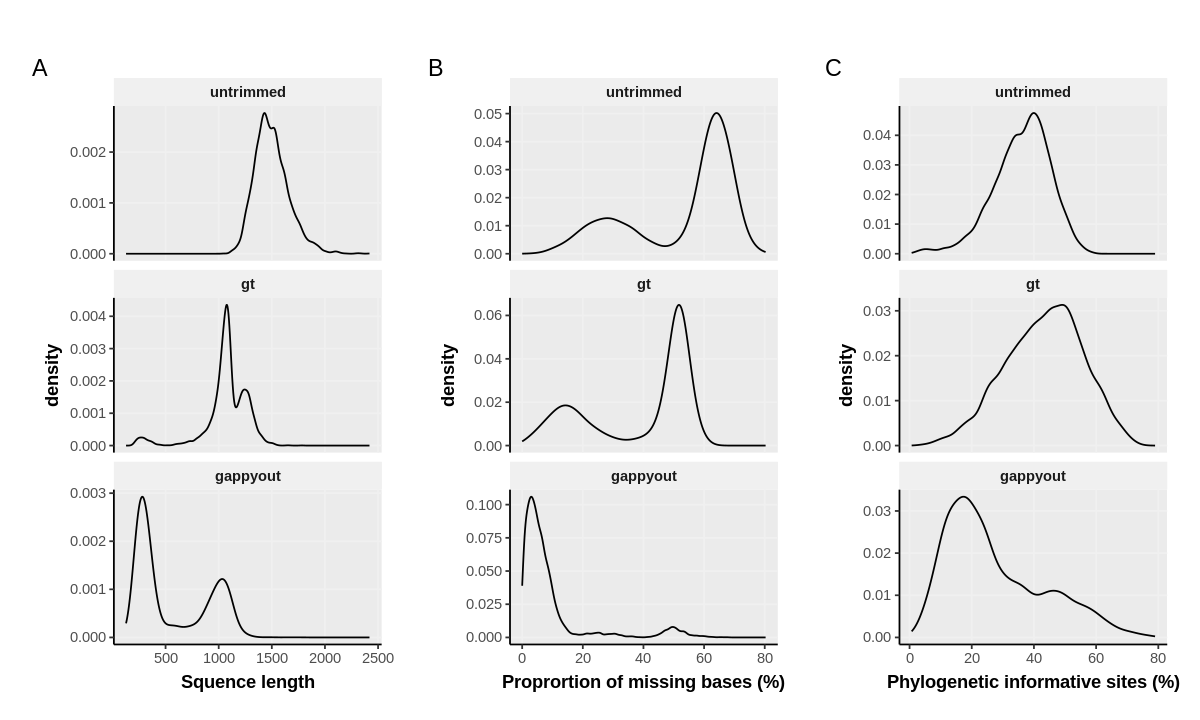

In [15]:
summary_all_common_diff <- summary_all_common_diff %>%
    mutate_at(c("Num_class", "Num_class_on_mixture", "Model", "Best", "Type"), as.factor) %>%
    mutate(Model = relevel(Model, "One_class"),
           Best = relevel(Best, "One_class"),
           Type = factor(Type, levels = c("untrimmed", "gt", "gappyout")))

summary_all_common <- summary_all_common %>%
    mutate_at(c("Num_class", "Num_class_on_mixture", "Model", "Best", "Type"), as.factor) %>%
    mutate(Model = relevel(Model, "One_class"),
           Best = relevel(Best, "One_class"),
           Type = factor(Type, levels = c("untrimmed", "gt", "gappyout")))

summary_all_common <- summary_all_common %>% 
    mutate(prop_miss = sapply(summary_all_common$real_base_freq, function(x) x[[5]])) %>% 
    mutate(prop_miss = as.numeric(prop_miss))

options(repr.plot.width = 10, repr.plot.height = 6)
plot_length <- summary_all_common %>% ggplot(aes(x = Length)) + 
    geom_density() +
    facet_wrap(~Type, scales = "free_y", ncol = 1) +
    theme_Publication() +
    xlab("Squence length") +
    # ggtitle("Distribution of sequence length under different trim") +
    theme(plot.title = element_text(size = 12))

plot_pp <- summary_all_common %>% ggplot(aes(x = Percent_parsimony_informative)) + 
    geom_density(alpha = 0.5) + 
    facet_wrap(~Type, scales = "free_y", ncol = 1) +
    theme_Publication() +
    # ggtitle("Distribution of parsimony sites under different trim") +
    xlab("Phylogenetic informative sites (%)") +
    theme(plot.title = element_text(size = 12))

plot_pm <- summary_all_common %>% ggplot(aes(x = prop_miss*100)) + 
    geom_density(alpha = 0.5) + 
    facet_wrap(~Type, scales = "free_y", ncol = 1) +
    theme_Publication() +
    # ggtitle("Distribution of parsimony sites under different trim") +
    xlab("Proprortion of missing bases (%)") +
    theme(plot.title = element_text(size = 12))

plot_length + plot_pm + plot_pp + plot_annotation(tag_levels = 'A') & 
  theme(plot.tag = element_text(size = 14))

In [16]:
summary_all_common_diff <- summary_all_common_diff %>% na.omit() %>%
    mutate(baysian_factor = 2*d_Likelihood)

plot_class <- summary_all_common %>% filter(Model == "Mixture") %>%
    ggplot(aes(x = Num_class, fill = Type)) + 
    geom_bar(position = "dodge", width = 0.6) +
    theme_Publication() +
    ggtitle("Number of classes in mixture model") +
    labs(x = "Number of classes", y = "Count", fill = "Trimming method")

plot_bf <- summary_all_common_diff %>%
    filter(Num_class_on_mixture != "1") %>%
    ggplot(aes(x = Num_class_on_mixture, y = baysian_factor)) +
    geom_violin() +
    stat_summary(fun = "mean", geom = "point", color = "red3", size = 3) +
    geom_hline(yintercept = 10, color = "red3", alpha = 0.5) +
    geom_text(x = 4, y = 4, label = "LogBF = 10", color = "red3", size = 4) +
    theme_Publication() +
    ylim(-10, 200) +
    ggtitle("Log(BF) on Mixture Model With Multi-class") +
    labs(x = "Number of classes on Mixture model", y = "Logarithmic Bayesian factor")

plot_bf_class <- summary_all_common_diff %>%
    filter(Num_class_on_mixture != "1") %>%
    ggplot(aes(x = Num_class_on_mixture, y = d_BIC)) +
    geom_violin() +
    geom_hline(yintercept = 0, color = "red3", alpha = 0.5) +
    geom_text(x = 4, y = 10, label = "d(BIC) = 0", color = "red3", size = 4) +
    stat_summary(fun = "mean", geom = "point", color = "red3", size = 3) +
    theme_Publication() +
    ylim(-110, 25) +
    ggtitle("d(BIC) on Mixture Model With Multi-class") +
    labs(x = "Number of classes on Mixture model", y = "BIC change")

Warning message:
“Removed 4 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_summary()`).”


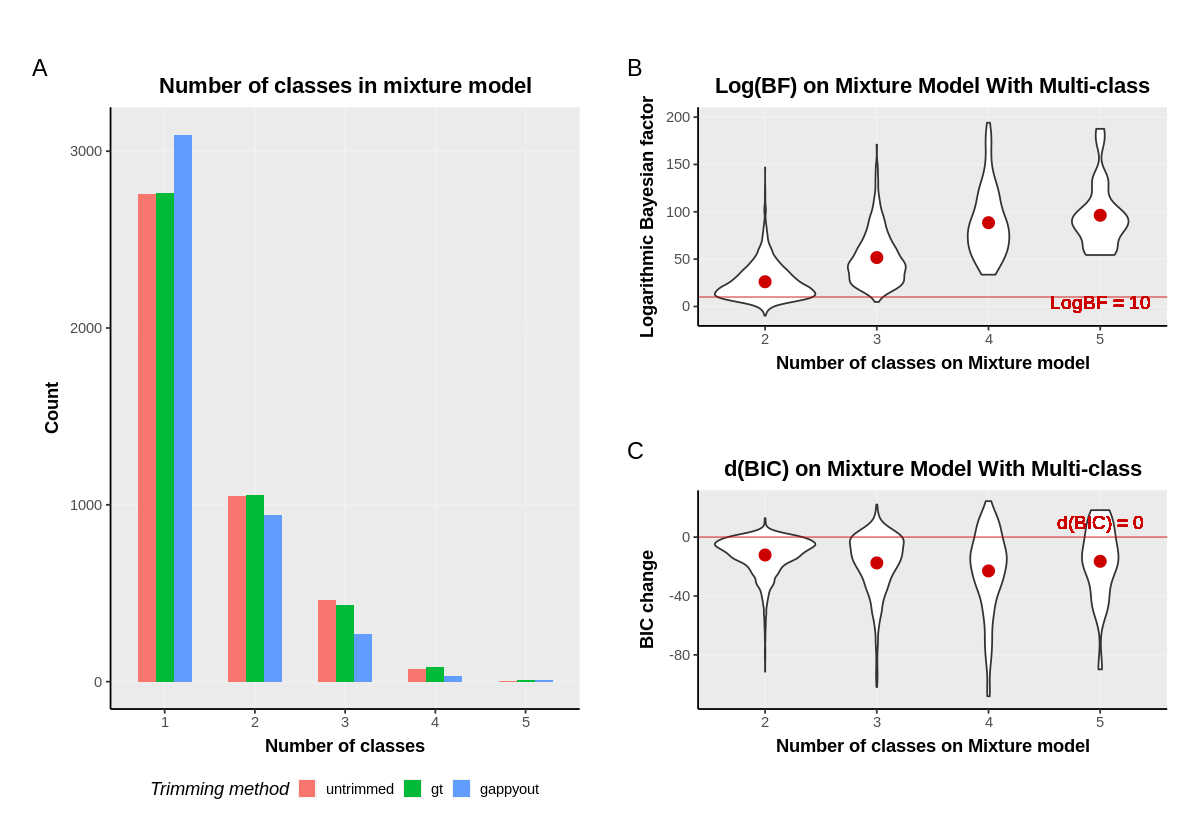

In [17]:
options(repr.plot.width = 10, repr.plot.height = 7)

patchwork <- plot_class | plot_bf / plot_bf_class + plot_layout(heights = c(2, 2))
patchwork +
  plot_annotation(tag_levels = "A") & 
  theme(plot.tag = element_text(size = 14))

In [18]:
# get if_mix and best
if_mix_vector <- summary_all_common %>% filter(Model == "Mixture") %>% pull(Type)
best_vector <- summary_all_common %>% filter(Model == "Mixture") %>% pull(Num_class)
table(best_vector)

best_vector
   1    2    3    4    5 
8612 3053 1159  183   25 

In [19]:
# The effect of trimming on the number of classes
summary_all_common %>%
  filter(class_id == 1) %>%
  select(Locus_name, Type, Tree_Length, Model) %>%
  na.omit() %>%
  group_by(Model, Type) %>%
  summarize(
    mean = mean(Tree_Length),
    sd = sd(Tree_Length),
    .groups = "drop"
  ) %>%
  select(Model, Type, mean) %>%
  pivot_longer(cols = mean, names_to = "Statistic", values_to = "Value") %>%
  pivot_wider(names_from = Model, values_from = Value) %>%
  select(Type, One_class,Mixture)




# Tree_length_in_types <- summary_all_common %>%
#   filter(Model == "Mixture" & class_id == 1) %>% select(Num_class_on_mixture, Type, Tree_Length) %>%
#   spread(key = Type, value = Tree_Length)

# Tree_length_in_types %>% 
#   select(-Locus_name) %>% 
#   summarize_all(list(mean = mean, sd = sd))


Type,One_class,Mixture
<fct>,<dbl>,<dbl>
untrimmed,4.126787,4.232395
gt,3.491072,3.580150
gappyout,1.512029,1.545979


In [20]:
cp_nrf <- summary_all_common_diff %>% 
    ggplot(aes(x = Num_class_on_mixture, y = cp_nRF_distance, fill = Best)) +
    geom_boxplot() +
    theme_Publication() +
    labs(x = "Number of classes on mixture model", y = "nRF distance")

cp_spr <- summary_all_common_diff %>% 
    ggplot(aes(x = Num_class_on_mixture, y = cp_SPR_distance, fill = Best)) +
    geom_boxplot() +
    theme_Publication() +
    labs(x = "Number of classes on mixture model", y = "SPR distance")

avg_data <- summary_all_common %>% filter(If_mix == TRUE & class_id == 1) %>% 
    group_by(Model, Type) %>% summarise(avg_Tree_Length = mean(Tree_Length))

cp_length <- ggplot(data = summary_all_common %>% filter(If_mix == TRUE & class_id == 1),
       mapping = aes(x = Model, y = Tree_Length, fill = Model)) +
  geom_line(mapping = aes(group = Locus_name),
            alpha = 0.05,
            position = position_dodge(0.1)) +
  geom_violindot(dots_size = 0.6,
                 position_dots = position_dodge(0.1),
                 flip = c(1)) +
  geom_line(data = avg_data, aes(y = avg_Tree_Length, group=1), 
            color="red2", linetype = "dashed", lwd = 0.8) +  # add the average line
  theme_Publication() +
  theme(legend.position = "none",
        axis.text.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        axis.title.x = element_blank(),
        axis.text.y = element_text(size = 10)) +
  facet_wrap(~Type, nrow = 1) + 
  ggtitle("Change on Branch length using mixture model") +
  ylim(0, 18)


`summarise()` has grouped output by 'Model'. You can override using the `.groups` argument.
Warning message in geom_dotplot(binaxis = "y", mapping = mapping, data = data, dotsize = size_dots, :
“Ignoring unknown parameters: `flip`”


Warning message:
“Removed 6 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 6 rows containing missing values (`stat_bindot()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


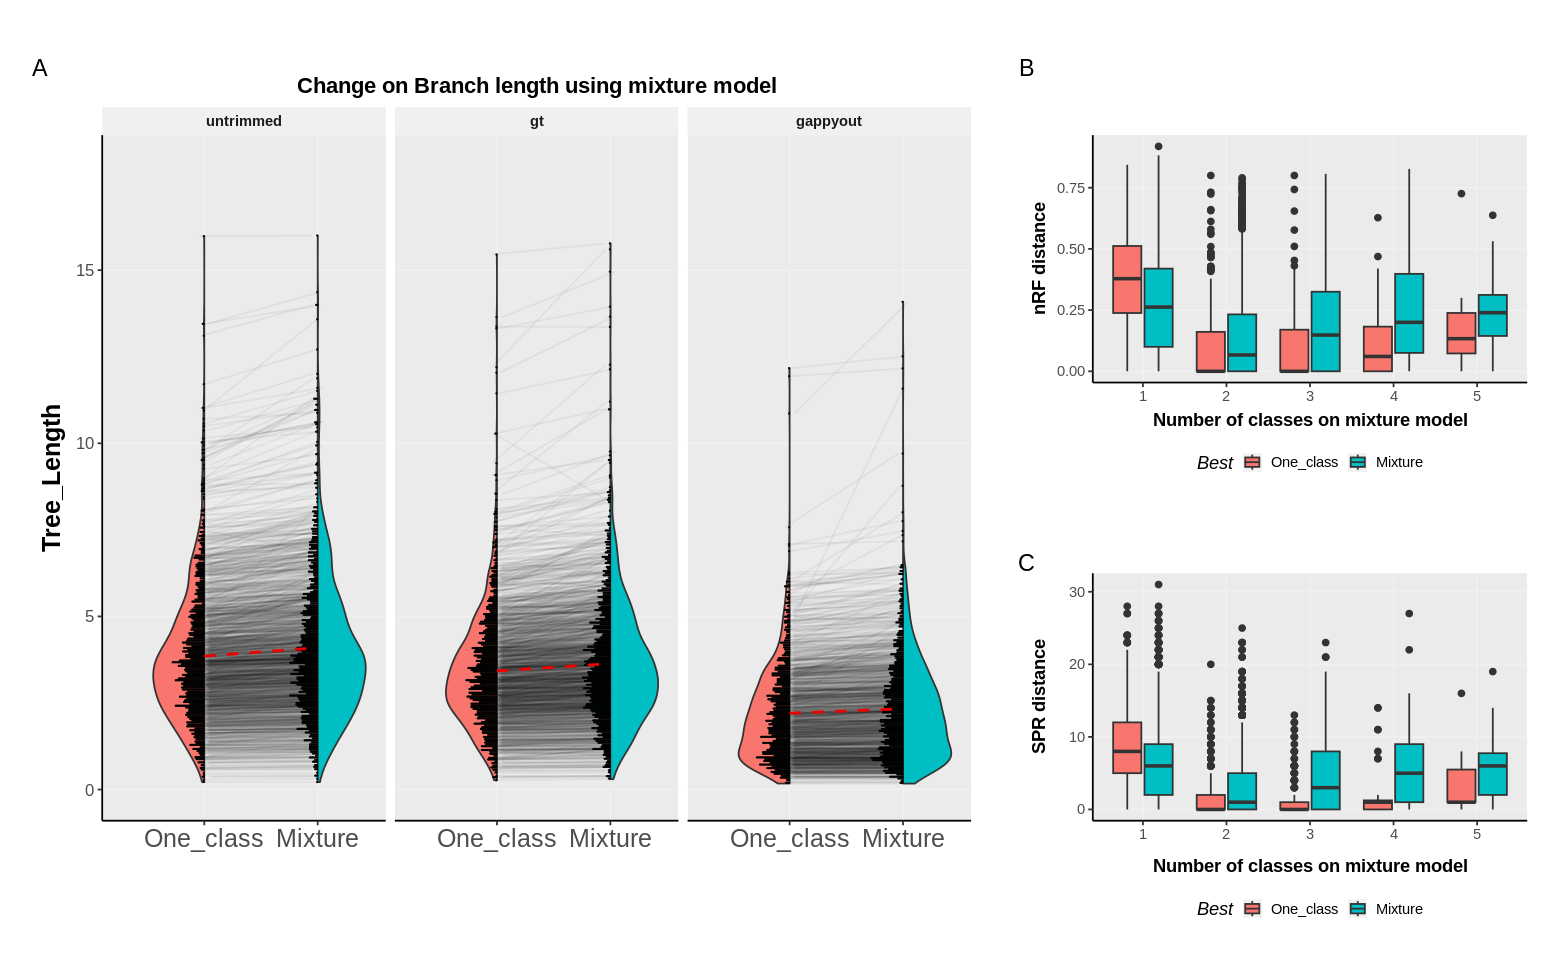

In [21]:
options(repr.plot.width = 13, repr.plot.height = 8)
cp_length + cp_nrf / cp_spr + plot_layout(width = c(4, 2)) + 
  plot_annotation(tag_levels = "A") & 
  theme(plot.tag = element_text(size = 14))

In [22]:
summary_all_common_diff_percent <- summary_all_common %>%
  select(Type, Model, Locus_name, where(is.numeric) ,Num_class, Num_class_on_mixture) %>%
  select(-c(Length, Ntaxa, Percent_constant, Site_patterns, Num_class, Percent_parsimony_informative, Num_class_on_mixture)) %>%
  gather(Parameter, Value, -Model, -Locus_name, -Type) %>%
  spread(Model, Value) %>%
  group_by(Type, Locus_name, Parameter) %>%
  summarise(Difference = (Mixture - One_class)/One_class, .groups = "drop") %>%
  pivot_wider(names_from = Parameter, values_from = Difference)

summary_diff_add <- summary_all_common %>%
  select(Type, Model, Locus_name, If_mix, Best, Length, Ntaxa, Percent_constant, Percent_parsimony_informative, 
         Site_patterns, Num_class, Num_class_on_mixture) %>%
  filter(Model == "Mixture") %>%
  select(-Model)

summary_all_common_diff_percent <- left_join(summary_all_common_diff_percent, summary_diff_add, by = c("Type", "Locus_name"))

Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”


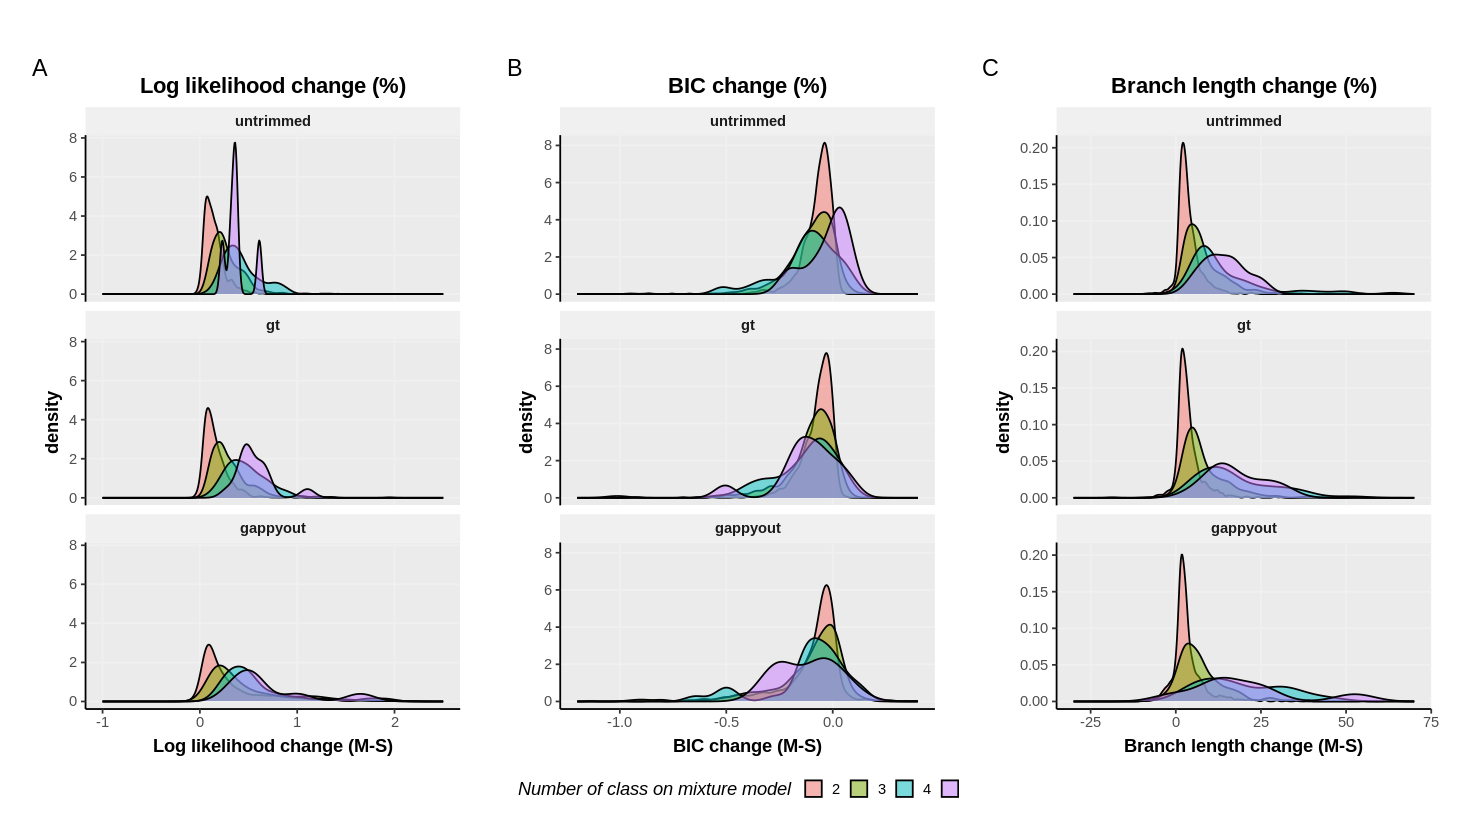

In [23]:
plot_d_ll <- summary_all_common_diff_percent %>% filter(Num_class_on_mixture != "1" & If_mix == TRUE) %>%
  ggplot(aes(x = -Likelihood*100, fill = as.factor(Num_class_on_mixture))) + 
  xlim(-1, 2.5) +
  geom_density(alpha = 0.5) + facet_wrap(~Type, ncol = 1) +
  ggtitle("Log likelihood change (%)") +
  theme_Publication() +
  labs(fill = "Number of class on mixture model", x = "Log likelihood change (M-S)") +
  theme(legend.position = "none")

plot_d_BIC <- summary_all_common_diff_percent %>% filter(Num_class_on_mixture != "1" & If_mix == TRUE) %>%
  ggplot(aes(x = BIC*100, fill = as.factor(Num_class_on_mixture))) + 
  geom_density(alpha = 0.5) + facet_wrap(~Type, ncol = 1) + 
  xlim(-1.2, 0.4) +
  ggtitle("BIC change (%)") +
  theme_Publication() +
  labs(fill = "Number of class on mixture model", x = "BIC change (M-S)") +
  theme(legend.position = "bottom")

plot_d_tl <- summary_all_common_diff_percent %>% filter(Num_class_on_mixture != "1" & If_mix == TRUE) %>%
  ggplot(aes(x = Tree_Length*100, fill = as.factor(Num_class_on_mixture))) + 
  geom_density(alpha = 0.5) + facet_wrap(~Type, ncol = 1) + 
  xlim(-30, 70) +
  ggtitle("Branch length change (%)") +
  theme_Publication() +
  labs(fill = "Number of class on mixture model", x = "Branch length change (M-S)") +
  theme(legend.position = "none")

options(repr.plot.width = 12.2, repr.plot.height = 7)
plot_d_ll + plot_d_BIC + plot_d_tl +
  plot_annotation(tag_levels = "A") & 
  theme(plot.tag = element_text(size = 14))

In [24]:
colnames(summary_all_common_diff)

[1] "Type"                          "Locus_name"                   
 [3] "d_1st Qu."                     "d_3rd Qu."                    
 [5] "d_AIC"                         "d_AICc"                       
 [7] "d_BIC"                         "d_GMM_num_class"              
 [9] "d_KF_distance"                 "d_Likelihood"                 
[11] "d_Max."                        "d_Mean"                       
[13] "d_Median"                      "d_Min."                       
[15] "d_RF_distance"                 "d_Run_time"                   
[17] "d_SPR_distance"                "d_Sum_int"                    
[19] "d_Tree_Length"                 "d_Unconstrained_likelihood"   
[21] "d_nRF_distance"                "d_path_distance"              
[23] "d_prop_int"                    "d_wRF_distance"               
[25] "d_If_mix"                      "d_Best"                       
[27] "Model"                         "Model_string"                 
[29] "Rates"                         "Likelihood"                   
[31] "Unconstrained_likelihood"      "parameters"                   
[33] "AIC"                           "AICc"                         
[35] "BIC"                           "Best"                         
[37] "Length"                        "Ntaxa"                        
[39] "Percent_constant"              "Percent_parsimony_informative"
[41] "Site_patterns"                 "real_base_freq"               
[43] "GMM_pro"                       "GMM_mean"                     
[45] "GMM_num_class"                 "RF_distance"                  
[47] "nRF_distance"                  "wRF_distance"                 
[49] "KF_distance"                   "SPR_distance"                 
[51] "path_distance"                 "Tree_Length"                  
[53] "Sum_int"                       "prop_int"                     
[55] "Min."                          "1st Qu."                      
[57] "Median"                        "Mean"                         
[59] "3rd Qu."                       "Max."                         
[61] "If_mix"                        "Num_class"                    
[63] "Num_class_on_mixture"          "Run_time"                     
[65] "class_id"                      "class"                        
[67] "F_type"                        "df_R"                         
[69] "R"                             "F"                            
[71] "Q"                             "base_freq"                    
[73] "cp_RF_distance"                "cp_nRF_distance"              
[75] "cp_wRF_distance"               "cp_KF_distance"               
[77] "cp_SPR_distance"               "cp_path_distance"             
[79] "baysian_factor"

Warning message:
“Removed 12 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”


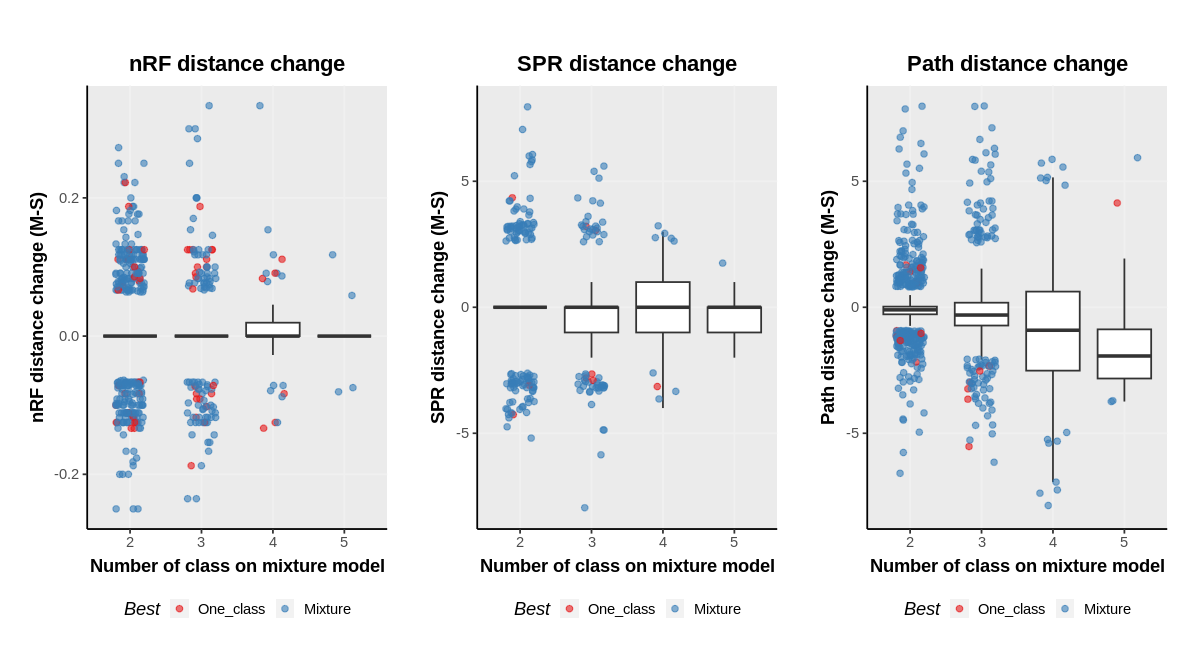

In [25]:
# Function to filter outliers based on group-specific quantiles
filter_quantile <- function(df, var, lower_quantile = 0.05, upper_quantile = 0.95) {
  df %>%
    filter(Num_class_on_mixture != "1") %>%
    group_by(Num_class_on_mixture) %>%
    filter((!!sym(var) < quantile(!!sym(var), lower_quantile, na.rm = TRUE)) | (!!sym(var) > quantile(!!sym(var), upper_quantile, na.rm = TRUE)))
}


plot_nrf <- summary_all_common_diff %>% 
  filter(Num_class_on_mixture != 1) %>%
  ggplot(aes(x = Num_class_on_mixture, y = d_nRF_distance)) + 
  geom_boxplot(outlier.shape = NA) +  
  geom_point(data = filter_quantile(summary_all_common_diff, "d_nRF_distance"), 
             aes(color = Best), 
             alpha = 0.6, 
             position = position_jitter(width = 0.2)) + 
  scale_color_brewer(palette = "Set1") +
  ggtitle("nRF distance change") +
  theme_Publication() +
  labs(fill = "Number of class on mixture model", x = "Number of class on mixture model", y = "nRF distance change (M-S)") +
  theme(legend.position = "bottom")

plot_spr <- summary_all_common_diff %>% 
  filter(Num_class_on_mixture != 1) %>%
  ggplot(aes(x = Num_class_on_mixture, y = d_SPR_distance)) + 
  geom_boxplot(outlier.shape = NA) +  
  geom_point(data = filter_quantile(summary_all_common_diff, "d_SPR_distance"), 
             aes(color = Best), 
             alpha = 0.6, 
             position = position_jitter(width = 0.2)) + 
  scale_color_brewer(palette = "Set1") +
  ggtitle("SPR distance change") +
  theme_Publication() +
  labs(fill = "Number of class on mixture model", x = "Number of class on mixture model", y = "SPR distance change (M-S)") +
  theme(legend.position = "bottom") 


plot_path <- summary_all_common_diff %>% 
  filter(Num_class_on_mixture != 1) %>%
  filter(d_wRF_distance > -3.5 & d_wRF_distance < 3.5) %>%
  ggplot(aes(x = Num_class_on_mixture, y = d_path_distance)) + 
  geom_boxplot(outlier.shape = NA) +  
  geom_point(data = filter_quantile(summary_all_common_diff, "d_path_distance"), 
             aes(color = Best), 
             alpha = 0.6, 
             position = position_jitter(width = 0.2)) + 
  scale_color_brewer(palette = "Set1") +
  ggtitle("Path distance change") +
  theme_Publication() +
  labs(fill = "Number of class on mixture model", x = "Number of class on mixture model",  y = "Path distance change (M-S)") +
  theme(legend.position = "bottom") + 
    ylim(-8, 8)

options(repr.plot.width = 10, repr.plot.height = 5.5)
plot_nrf + plot_spr + plot_path

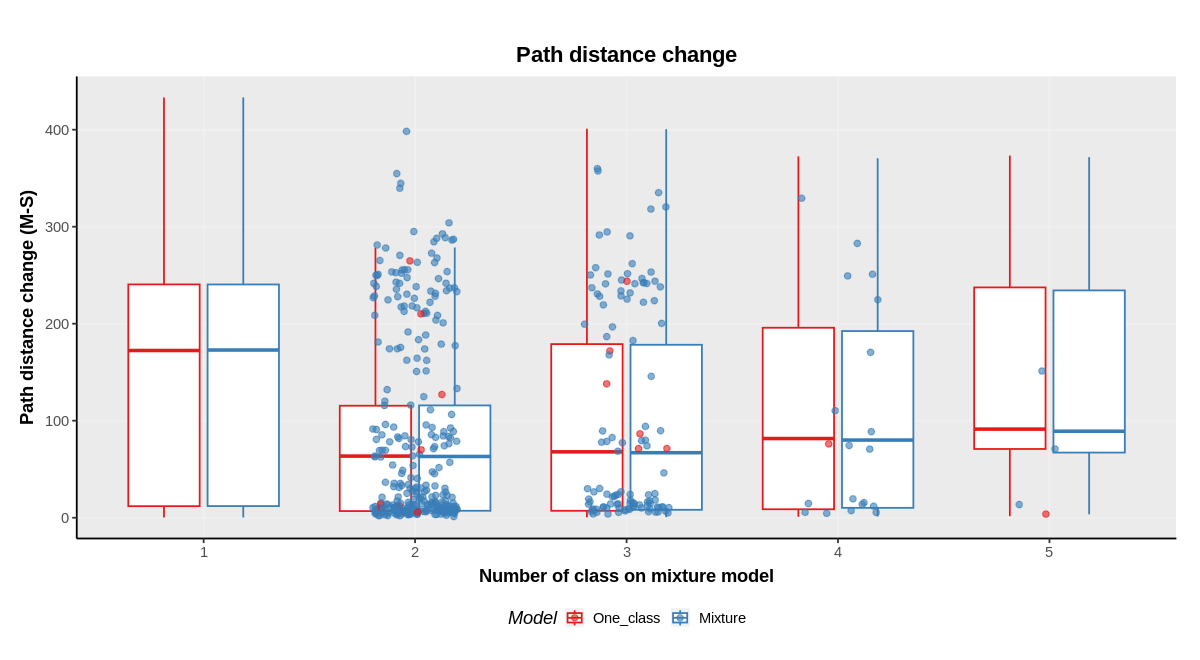

In [26]:
summary_all_common %>% ggplot(aes(x = Num_class_on_mixture, y = path_distance, color = Model)) + 
  geom_boxplot(outlier.shape = NA) +  
  geom_point(data = filter_quantile(summary_all_common_diff, "d_path_distance"), 
             aes(color = Best), 
             alpha = 0.6, 
             position = position_jitter(width = 0.2)) + 
  scale_color_brewer(palette = "Set1") +
  ggtitle("Path distance change") +
  theme_Publication() +
  labs(fill = "Number of class on mixture model", x = "Number of class on mixture model",  y = "Path distance change (M-S)") +
  theme(legend.position = "bottom")

`summarise()` has grouped output by 'Model'. You can override using the `.groups` argument.


Model,Type,Run_time
<fct>,<fct>,<dbl>
One_class,untrimmed,647.13813
One_class,gt,368.51961
One_class,gappyout,76.30799
Mixture,untrimmed,802.78755
Mixture,gt,500.74629
Mixture,gappyout,102.15441


`geom_smooth()` using formula = 'y ~ x'


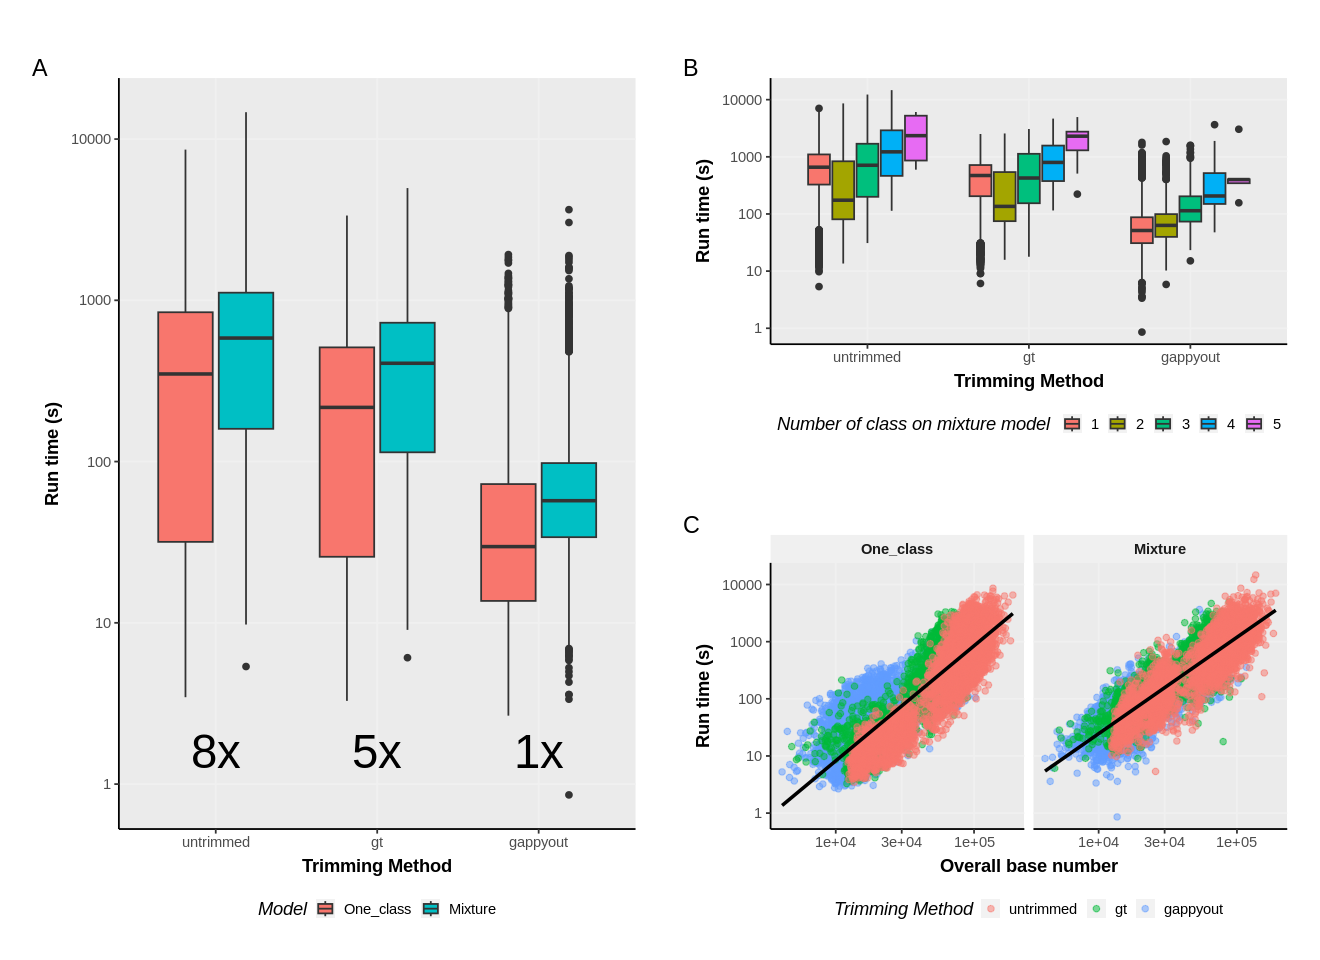

In [27]:
summary_all_common %>% group_by(Model, Type) %>% 
    summarise(Run_time = mean(Run_time))


labels <- data.frame(Type = c("gappyout", "gt", "untrimmed"), 
                     Run_time = c(1, 1, 1), 
                     Label = c("1x", "5x", "8x"))

plot_time <- summary_all_common %>% ggplot(aes(x = Type, y = Run_time)) +
    geom_boxplot(aes(fill = Model)) +
    scale_y_log10() +
    geom_text(data = labels, aes(x = Type, y = Run_time, label = Label),
              vjust = -0.5, size = 10, color = "black") +
    theme_Publication() +
    labs(color = "Trimming Method", x = "Trimming Method", y = "Run time (s)")

plot_time2 <- summary_all_common %>% filter(Model == "Mixture") %>%
    ggplot(aes(x = Type, y = Run_time, fill = as.factor(Num_class))) +
    geom_boxplot() +
    scale_y_log10() +
    theme_Publication() +
    labs(color = "Trimming Method", x = "Trimming Method", y = "Run time (s)",
         fill = "Number of class on mixture model")

plot_time_scale <- summary_all_common %>%
    ggplot(aes(x = Length*Ntaxa, y = Run_time, color = Type)) +
    geom_point(alpha = 0.5) +
    scale_y_log10() +
    scale_x_log10() +
    geom_smooth(method = "lm", color = "black") +
    theme_Publication() +
    labs(color = "Trimming Method", x = "Overall base number", y = "Run time (s)") +
    facet_wrap(~Model)

options(repr.plot.width = 11, repr.plot.height = 8)
plot_time + plot_time2 / plot_time_scale+
  plot_annotation(tag_levels = "A") & 
  theme(plot.tag = element_text(size = 14))